<a href="https://colab.research.google.com/github/jahnavikoneti21/handwritten-digit-recognisation/blob/main/HandWrittenDigit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
!kaggle competitions download -c digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip \*.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
x_train =pd.read_csv("train.csv")

In [7]:
x_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train = x_train['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
x_test=pd.read_csv('test.csv')
x_train = x_train.drop(columns=['label'])

In [10]:
x_train.shape

(42000, 784)

In [11]:
x_train=x_train/255

In [12]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
x_test=x_test/255

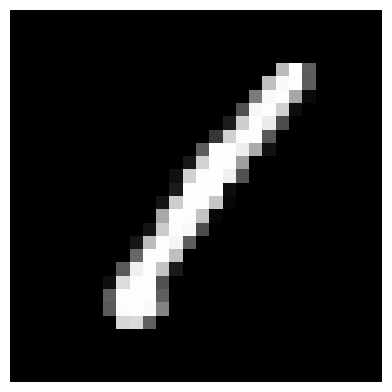

In [14]:
image_index = 0
selected_row = x_train.iloc[image_index, :]
image_matrix = selected_row.values.reshape(28, 28)
plt.matshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()


In [15]:
y_train[0]

1

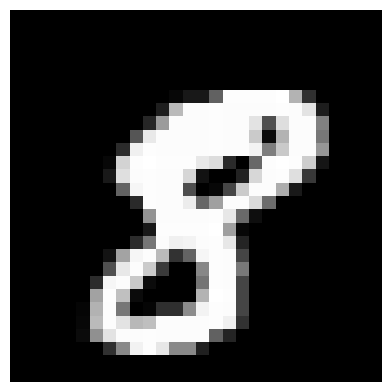

In [16]:
image_index = 10
selected_row = x_train.iloc[image_index, :]
image_matrix = selected_row.values.reshape(28, 28)
plt.matshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()


In [17]:
y_train[10]

8

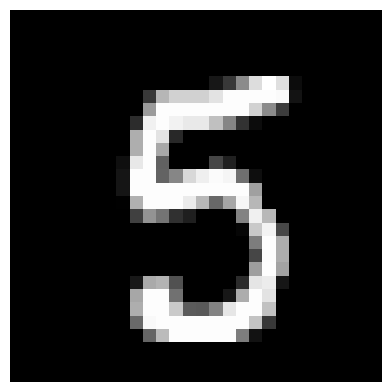

In [18]:
image_index = 10
selected_row = x_test.iloc[image_index, 0:]
image_matrix = selected_row.values.reshape(28, 28)
plt.matshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()

In [19]:
x_test.shape

(28000, 784)

In [20]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')

])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']

)
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5223 - accuracy: 0.8649
Epoch 2/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3145 - accuracy: 0.9126
Epoch 3/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.9192
Epoch 4/20
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2650 - accuracy: 0.9245
Epoch 6/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2591 - accuracy: 0.9269
Epoch 7/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2542 - accuracy: 0.9289
Epoch 8/20
1313/1313 [==============================] - 1s 1ms/step - loss: 0.2498 - accuracy: 0.9298
Epoch 9/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2464 - accuracy: 0.9311
Epoch 10/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.243

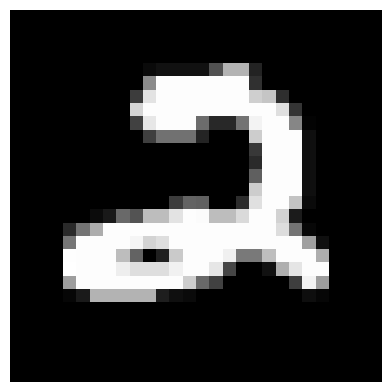

In [21]:
image_index = 0
selected_row = x_test.iloc[image_index, 0:]
image_matrix = selected_row.values.reshape(28, 28)
plt.matshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()


In [22]:
y_predicted=model.predict(x_test)

875/875 [==============================] - 1s 931us/step


In [23]:
y_predicted[0]


array([9.4045639e-02, 3.6352555e-16, 9.9998558e-01, 1.5074337e-01,
       5.1187709e-07, 3.4462397e-03, 4.2614298e-05, 5.7958425e-07,
       5.6660593e-02, 5.9823142e-05], dtype=float32)

In [24]:
np.argmax(y_predicted[0])

2

In [25]:
np.argmax(y_predicted[10])

5

In [ ]:
image_index = 10
x_test.iloc[image_index, 0:]
image_matrix = selected_row.values.reshape(28, 28)
plt.matshow(image_matrix, cmap='gray')
plt.axis('off')
plt.show()